In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp

Tabelle: Messung der Schwingungen pro Schwebung

In [4]:
extrema = pd.read_csv('md_extrema.csv')
print(extrema.to_latex(index = False, column_format= 'c c', float_format= '%.2f'))

\begin{tabular}{c c}
\toprule
 C\_k / nF &  Maxima \\
\midrule
     2.19 &       4 \\
     2.86 &       5 \\
     4.74 &       7 \\
     6.86 &       9 \\
     8.18 &      10 \\
     9.99 &      11 \\
    12.00 &      12 \\
\bottomrule
\end{tabular}



Tabelle: Berechnung der Schwingungen pro Schwebung

In [5]:
C_k = extrema.iloc[:,:]
# C_k = extrema.iloc[:,[0]].values.T[0]
# print(C_k)
np.savetxt('C_k.txt', C_k.values, header='C_k', fmt='%.4f')
C_k, n = np.genfromtxt('C_k.txt', unpack=True, skip_header=1)
n = np.insert(n, 0, 0, axis=None)
C_k = np.insert(C_k, 0, 0.997, axis=None)
C_k *= 10**-9
print(n)
C_k = unp.uarray(C_k, C_k*0.003)
print(C_k)

nu_plus_id = 36.51 *1000
L = 0.023954
C = 0.7932e-9

def nu_minus(l, c, ck):
    return (1/(2*np.pi)) * ( l * ( (1/c) + (2/ck) )**(-1) )**(-1/2)

def nu_schwingung(nu_m, nu_p):
    return 0.5*(nu_m + nu_p)

def nu_schwebung(nu_m, nu_p):
    return nu_m - nu_p

def n_anzahl(nu_schwingung, nu_schwebung):
    return nu_schwingung/nu_schwebung

def relWert(x ,xw):
    return 100*(abs(x-xw))/x

# Berechnung
nu_minus_id = nu_minus(L, C, C_k)
nu_schwingung_id = nu_schwingung(nu_minus_id, nu_plus_id)
nu_schwebung_id = nu_schwebung(nu_minus_id, nu_plus_id)
n_id = n_anzahl(unp.nominal_values(nu_schwingung_id), unp.nominal_values(nu_schwebung_id))
n_rel = relWert(n, n_id)

# Runden der Unsicherheiten (bringt nichts, keine Ahnung)
nu_minus_id_r = nu_minus_id*10**-3
nu_minus_id_r = unp.uarray(np.round(unp.nominal_values(nu_minus_id_r), 2), np.round(unp.std_devs(nu_minus_id_r), 3)) 

nu_schwingung_id_r = nu_schwingung_id*10**-3
nu_schwingung_id_r = unp.uarray(np.round(unp.nominal_values(nu_schwingung_id_r), 2), np.round(unp.std_devs(nu_schwingung_id_r), 3))

nu_schwebung_id_r = nu_schwebung_id*10**-3
nu_schwebung_id_r = unp.uarray(np.round(unp.nominal_values(nu_schwebung_id_r), 2), np.round(unp.std_devs(nu_schwebung_id_r), 3))

#n_id_r = unp.uarray(np.round(unp.nominal_values(n_id), 2), np.round(unp.std_devs(n_id), 3))
n_id_r = np.round(n_id, 2)
print(n_id)
n_rel_r = np.round(n_rel, 2)


d1 = {'C_k/nF': C_k*10**9, 'nu_plus/kHz': nu_plus_id*10**-3, 'nu_minus/kHz': nu_minus_id_r, 'nu_schwingung/kHz': nu_schwingung_id_r,
 'nu_schwebung/kHz': nu_schwebung_id_r, 'n': n_id_r, 'n_rel': n_rel_r} 

df1 = pd.DataFrame(data = d1)
print(df1.to_latex(index = False, column_format= "c c c c c c c"))


[ 0.  4.  5.  7.  9. 10. 11. 12.]
[9.97e-10+/-2.991e-12 2.19e-09+/-6.5700000000000005e-12
 2.86e-09+/-8.580000000000001e-12
 4.740000000000001e-09+/-1.4220000000000002e-11
 6.860000000000001e-09+/-2.058e-11 8.18e-09+/-2.454e-11
 9.99e-09+/-2.997e-11 1.2000000000000002e-08+/-3.6000000000000005e-11]
[ 2.13983958  3.69241694  4.5493965   6.93669094  9.61659806 11.28234096
 13.56431498 16.09641782]
\begin{tabular}{c c c c c c c}
\toprule
         C\_k/nF &  nu\_plus/kHz &   nu\_minus/kHz & nu\_schwingung/kHz & nu\_schwebung/kHz &     n &  n\_rel \\
\midrule
0.9970+/-0.0030 &        36.51 &   58.77+/-0.05 &    47.640+/-0.027 &     22.26+/-0.05 &  2.14 &    inf \\
  2.190+/-0.007 &        36.51 & 47.950+/-0.030 &    42.230+/-0.015 &   11.440+/-0.030 &  3.69 &   7.69 \\
  2.860+/-0.009 &        36.51 & 45.530+/-0.024 &    41.020+/-0.012 &    9.020+/-0.024 &  4.55 &   9.01 \\
  4.740+/-0.014 &        36.51 & 42.180+/-0.016 &    39.350+/-0.008 &    5.670+/-0.016 &  6.94 &   0.90 \\
  6.860+/-0.

/tmp/ipykernel_551/3677737102.py:30: RuntimeWarning: divide by zero encountered in true_divide
  return 100*(abs(x-xw))/x


Tabelle: Frequenzen der Fundamentalschwingungen

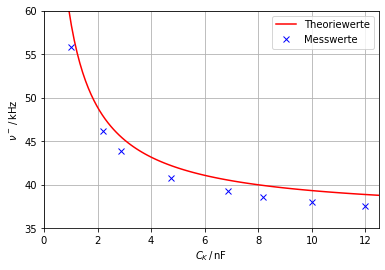

In [6]:
frequenz = pd.read_csv('md_frequenz.csv')
frequenz = frequenz.iloc[:,:]
np.savetxt('frequenz.txt', frequenz.values, header='nu^+ nu^-', fmt='%.3f')
ck, nu_p, n_m = np.genfromtxt('frequenz.txt', unpack=True, skip_header=1)

x = np.linspace(0.5, 13, 120)
y = nu_minus(L, C, x*10**-9)

plt.plot(x, y*10**-3, '-r', label = 'Theoriewerte')
plt.plot(ck, n_m, 'xb', label = 'Messwerte')
plt.xlabel(r'$C_{K} \,/\, \mathrm{nF}$')
plt.ylabel(r'$\nu^- \,/\, \mathrm{kHz}$')
plt.legend(loc="best")
plt.xlim(0, 12.5)
plt.ylim(35, 60)
plt.grid(True)
plt.show()

Tabelle: Fundamentalfrequenzen durch Peaks für \nu^+ = 30.66 kHz

In [7]:
peak = pd.read_csv('md_maxima_alt.csv')
peak = peak.iloc[:,[0,2]]
np.savetxt('peak.txt', peak.values, header='C_k/nF peak zu T/ms', fmt='%.2f')
C_k, peak = np.genfromtxt('peak.txt', unpack=True, skip_header=1)
print('Peaks zum Zeitpunkt (ms): ', peak)
C_k *= 10**-9
C_k = unp.uarray(C_k, C_k*0.003)

nu_plus_id = 30.66e3
L = 0.032351
C = 0.8015e-9

nu_plus = 1/(peak*10**-3) # Da Peaks in ms
nu_plus *= (1/20)*(10**3) # Woher auch immer ?!?!
nu_plus_r = np.round(nu_plus, 2)
print('Fundamentalfrequenzen (Hz): ', nu_plus_r) 
nu_plus_r *= 10**-3
nu_plus_r = np.round(nu_plus_r, 2)

nu_minus_id = nu_minus(L, C, C_k)
nu_minus_id_r = nu_minus_id*10**-3
nu_minus_id_r = unp.uarray(np.round(unp.nominal_values(nu_minus_id_r), 2), np.round(unp.std_devs(nu_minus_id_r), 3)) 

nu_plus_rel = relWert(nu_plus_id, nu_plus) # vertauscht, zu faul zum verbessern
print(nu_plus)
nu_plus_rel_r = np.round(nu_plus_rel, 2)

d1 = {'C_k/nF': C_k*10**9, 'Amplitude bei t/ms': peak, 'nu_plus/kHz': nu_plus_r, 'nu_plus_rel/kHz': nu_plus_rel_r, 'nu_minus/kHz': nu_minus_id_r} 
df1 = pd.DataFrame(data = d1)
print(df1.to_latex(index = False, column_format= "c c c"))


Peaks zum Zeitpunkt (ms):  [2.25 2.   1.75 1.75 1.5  1.5  1.5  1.5 ]
Fundamentalfrequenzen (Hz):  [22222.22 25000.   28571.43 28571.43 33333.33 33333.33 33333.33 33333.33]
[22222.22222222 25000.         28571.42857143 28571.42857143
 33333.33333333 33333.33333333 33333.33333333 33333.33333333]
\begin{tabular}{c c c}
\toprule
         C\_k/nF &  Amplitude bei t/ms &  nu\_plus/kHz &  nu\_plus\_rel/kHz &   nu\_minus/kHz \\
\midrule
1.1100+/-0.0033 &                2.25 &        22.22 &            27.52 &   48.86+/-0.04 \\
  2.030+/-0.006 &                2.00 &        25.00 &            18.46 & 41.810+/-0.028 \\
  3.000+/-0.009 &                1.75 &        28.57 &             6.81 & 38.720+/-0.020 \\
  4.000+/-0.012 &                1.75 &        28.57 &             6.81 & 36.990+/-0.016 \\
  5.020+/-0.015 &                1.50 &        33.33 &             8.72 & 35.900+/-0.013 \\
  6.470+/-0.019 &                1.50 &        33.33 &             8.72 & 34.910+/-0.010 \\
  8.000+/-0.024